In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams.update(rcParamsDefault)
large = 22; med = 12; small = 10
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 4,
      'ytick.major.size': 4,
      'xtick.major.width': 0.5,
      'ytick.major.width': 0.5,
      'xtick.minor.size': 4,
      'xtick.minor.width': 0.5,
      'ytick.minor.size': 4,
      'ytick.minor.width': 0.5,
      'axes.linewidth': 0.75,
      'xtick.direction' : 'in', 
      'ytick.direction' : 'in', 
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 4)

In [2]:
def data_loader(fname):
    fid = open(fname, "r")
    data = fid.readlines()
    fid.close()

    energy = []
    pdos = []

    for row in range(len(data)):
        data_row = data[row]
        if (data_row[0][0] != '#'):
            data_row = data_row[:-1].split('  ')
            energy.append(float(data_row[1]))
            pdos.append(float(data_row[3]))

    energy = np.asarray(energy)
    pdos = np.asarray(pdos)
    
    return energy, pdos

In [3]:
energy, pdos_s = data_loader('../src/al/al_pdos.dat.pdos_atm#1(Al)_wfc#1(s)')
_, pdos_p = data_loader('../src/al/al_pdos.dat.pdos_atm#1(Al)_wfc#2(p)')
_, pdos_tot = data_loader('../src/al/al_pdos.dat.pdos_tot')

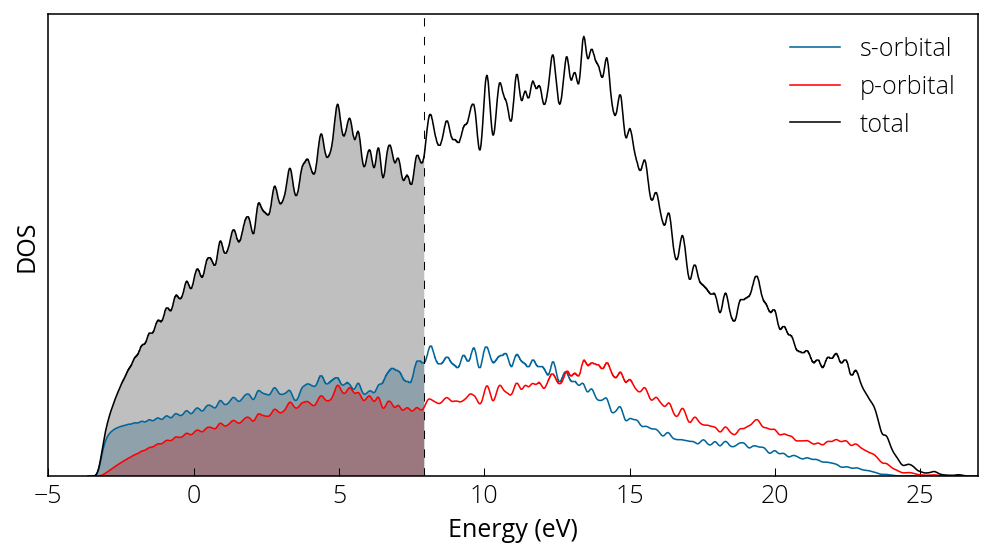

In [4]:
plt.figure(figsize = (8, 4))
plt.plot(energy, pdos_s, linewidth=0.75, color='#006699', label='s-orbital')
plt.plot(energy, pdos_p, linewidth=0.75, color='r', label='p-orbital')
plt.plot(energy, pdos_tot, linewidth=0.75, color='k', label='total')
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.axvline(x= 7.9421, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
plt.xlim(-5, 27)
plt.ylim(0, )
plt.fill_between(energy, 0, pdos_s, where=(energy < 7.9421), facecolor='#006699', alpha=0.25)
plt.fill_between(energy, 0, pdos_p, where=(energy < 7.9421), facecolor='r', alpha=0.25)
plt.fill_between(energy, 0, pdos_tot, where=(energy < 7.9421), facecolor='k', alpha=0.25)
# plt.text(6.5, 0.52, 'Fermi energy', fontsize= small, rotation=90)
plt.legend(frameon=False)
plt.show()